<a href="https://colab.research.google.com/github/d-maniatakos/thesis/blob/main/ES_RNN_notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ES-RNN

## Import Packages

In [3]:
!pip install ESRNN

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 42 kB 753 kB/s 


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from ESRNN import ESRNN
from ESRNN.m4_data import prepare_m4_data
from ESRNN.utils_evaluation import evaluate_prediction_owa

In [200]:
df = pd.read_csv('AirPassengers.csv')
df.index = pd.date_range(start='1949-01', end='1961-01', freq='M')
df = df['#Passengers']

y_df = df.to_frame().reset_index()
y_df.columns=['ds', 'y']
y_df.index.name = 'unique_id'
y_df = y_df.reset_index()
y_df['unique_id'] = 'Y1'
y_df['y'] = y_df['y'].astype(float)

x_df = y_df.copy()
x_df.columns=['unique_id','ds', 'x']
x_df['x'] = x_df['x'].astype('str')

x_df.dtypes

unique_id            object
ds           datetime64[ns]
x                    object
dtype: object

In [201]:
model = ESRNN(max_epochs=500, learning_rate=1e-4,
              per_series_lr_multip=0.8, lr_scheduler_step_size=10,
              lr_decay=0.1, gradient_clipping_threshold=50,
              rnn_weight_decay=0.0, level_variability_penalty=100,
              ensemble=True, seasonality=[],
              input_size=48, output_size=30,
              cell_type='LSTM', state_hsize=6,
              dilations=[[1], [6]], add_nl_layer=False,
              random_seed=1, device='cpu')

model.fit(x_df, y_df)

Infered frequency: M
=============== Training ESRNN  ===============

========= Epoch 0 finished =========
Training time: 0.06356
Training loss (50 prc): 0.73753
========= Epoch 1 finished =========
Training time: 0.06921
Training loss (50 prc): 0.73733
========= Epoch 2 finished =========
Training time: 0.0731
Training loss (50 prc): 0.73713
========= Epoch 3 finished =========
Training time: 0.06714
Training loss (50 prc): 0.73693
========= Epoch 4 finished =========
Training time: 0.06599
Training loss (50 prc): 0.73674
========= Epoch 5 finished =========
Training time: 0.07509
Training loss (50 prc): 0.73655
========= Epoch 6 finished =========
Training time: 0.07645
Training loss (50 prc): 0.73635
========= Epoch 7 finished =========
Training time: 0.06669
Training loss (50 prc): 0.73616
========= Epoch 8 finished =========
Training time: 0.07425
Training loss (50 prc): 0.73597
========= Epoch 9 finished =========
Training time: 0.07424
Training loss (50 prc): 0.73578
========= E

In [202]:
x_test_df = x_df.copy()
x_test_df['ds'] = pd.date_range(start='1961-01', periods=144, freq='M')
x_test_df

,unique_id,ds,x
0,Y1,1961-01-31,112.0
1,Y1,1961-02-28,118.0
2,Y1,1961-03-31,132.0
3,Y1,1961-04-30,129.0
4,Y1,1961-05-31,121.0
...,...,...,...
139,Y1,1972-08-31,606.0
140,Y1,1972-09-30,508.0
141,Y1,1972-10-31,461.0
142,Y1,1972-11-30,390.0


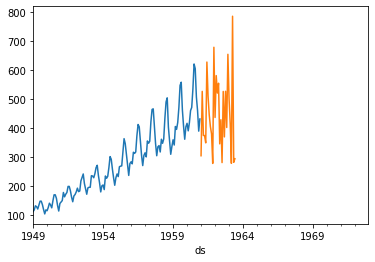

In [203]:
y_hat_df = model.predict(x_test_df)

y_hat_df = y_hat_df.set_index('ds')
y_hat_df = y_hat_df['y_hat']

y_df = y_df.set_index('ds')
y_df = y_df['y']

y_df.plot()
y_hat_df.plot()
plt.show()

In [184]:
y_hat_df

ds
1969-01-31   NaN
1969-02-28   NaN
1969-03-31   NaN
1969-04-30   NaN
1969-05-31   NaN
              ..
1980-08-31   NaN
1980-09-30   NaN
1980-10-31   NaN
1980-11-30   NaN
1980-12-31   NaN
Name: y_hat, Length: 144, dtype: float64